In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [2]:
# 2.Load Dataset
data = pd.read_csv("halong_quality.csv")
data

,date,pm25,pm10,o3,no2,so2,co
0,3/1/2019,6,6,45,3,500,NaN
1,3/2/2019,59,55,1,6,500,NaN
2,3/3/2019,43,28,5,9,500,NaN
3,3/4/2019,27,3,4,16,500,NaN
4,3/5/2019,48,17,16,1,500,NaN
...,...,...,...,...,...,...,...
1915,5/28/2024,64,32,48,9,500,NaN
1916,5/29/2024,47,20,23,8,500,NaN
1917,5/30/2024,40,6,49,9,500,NaN
1918,5/31/2024,12,18,14,8,500,NaN


In [3]:
#kích thước dữ liệu
data.shape
data.info()
#Mô tả bộ dữ liệu
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1920 non-null   object 
 1   pm25    1920 non-null   int64  
 2   pm10    1920 non-null   int64  
 3   o3      1920 non-null   int64  
 4   no2     1920 non-null   int64  
 5   so2     1920 non-null   int64  
 6   co      0 non-null      float64
dtypes: float64(1), int64(5), object(1)
memory usage: 105.1+ KB


,pm25,pm10,o3,no2,so2,co
count,1920.000000,1920.000000,1920.000000,1920.000000,1920.0,0.0
mean,40.085938,23.563021,18.845833,9.697396,500.0,NaN
std,22.956887,13.469754,20.556540,7.802379,0.0,NaN
min,5.000000,3.000000,1.000000,1.000000,500.0,NaN
25%,22.000000,13.000000,8.000000,1.000000,500.0,NaN
50%,38.000000,22.000000,13.000000,9.000000,500.0,NaN
75%,54.000000,32.000000,22.000000,15.000000,500.0,NaN
max,163.000000,86.000000,268.000000,36.000000,500.0,NaN


In [4]:
#Chọn thuộc tính
data = data[['pm25']]
data = data.dropna() 
data = data.reset_index(drop=True) 
data

,pm25
0,6
1,59
2,43
3,27
4,48
...,...
1915,64
1916,47
1917,40
1918,12


<Axes: >

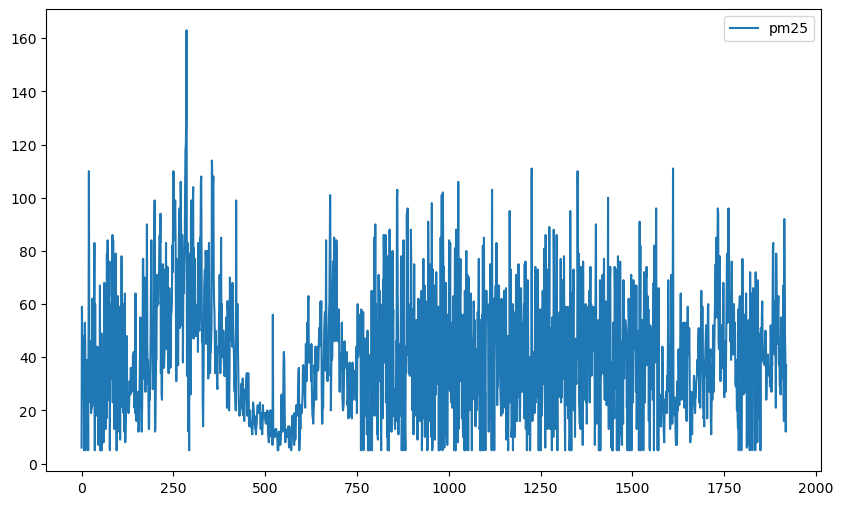

In [5]:
data.plot(figsize=(10,6))

In [6]:
# 2. Đọc file dữ liệu và chia train test theo tỉ lệ 7:3
train_size = int(0.7 * len(data))
test_size = int(0.3 * len(data))

# Chia dữ liệu thành các tập
train_data = data[:train_size]
test_data = data[train_size:]

# Kiểm tra kích thước của từng tập
print("Train data size:", len(train_data))
print("Test data size:", len(test_data))


Train data size: 1344
Test data size: 576


In [7]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['pm25'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11977.280, Time=1.59 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12633.466, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12340.221, Time=0.54 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11996.930, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12631.467, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11972.425, Time=1.57 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=11975.860, Time=0.53 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11974.196, Time=0.61 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=11979.647, Time=0.85 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=11976.721, Time=0.78 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11974.491, Time=0.88 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=11974.720, Time=4.00 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=11970.447, Time=0.77 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=11973.881, Time=0.36 sec
 ARIMA(1,1,1)(0,0,0

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [8]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(n_periods=len(y_test))


In [9]:
# 4. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  data.index[-1]
last_data = pd.RangeIndex(start=last_index + 1, stop=last_index+31, step=1)

# Tạo mảng 90 ngày 
x_next_30_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Dự đoán 90 ngày tiếp theo
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# # In ra dự đoán giá trong 90 ngày tiếp theo
print('Predicted closing prices for the next 90 days:')
print(y_next_30_days)

Predicted closing prices for the next 90 days:
[41.29820122 41.12979296 41.04508168 41.00247093 40.98103724 40.97025585
 40.96483269 40.96210478 40.96073261 40.96004239 40.9596952  40.95952056
 40.95943272 40.95938853 40.9593663  40.95935512 40.9593495  40.95934667
 40.95934525 40.95934453 40.95934417 40.95934399 40.9593439  40.95934385
 40.95934383 40.95934382 40.95934381 40.95934381 40.95934381 40.95934381
 40.95934381 40.95934381 40.95934381 40.95934381 40.95934381 40.95934381
 40.95934381 40.95934381 40.95934381 40.95934381 40.95934381 40.95934381
 40.95934381 40.95934381 40.95934381 40.95934381 40.95934381 40.95934381
 40.95934381 40.95934381 40.95934381 40.95934381 40.95934381 40.95934381
 40.95934381 40.95934381 40.95934381 40.95934381 40.95934381 40.95934381
 40.95934381 40.95934381 40.95934381 40.95934381 40.95934381 40.95934381
 40.95934381 40.95934381 40.95934381 40.95934381 40.95934381 40.95934381
 40.95934381 40.95934381 40.95934381 40.95934381 40.95934381 40.95934381
 40.

In [10]:
# 5. Tính RMSE
test_rmse = np.sqrt(np.mean((y_test - y_pred)**2))
print('Testing RMSE:', test_rmse)

# 6. Tính MAPE
test_mape = np.mean(np.abs((y_test - y_pred)/y_test))*100
print('\nTesting MAPE:', test_mape)

# 7. Tính MAE
test_mae = np.mean(np.abs(y_test - y_pred))
print("\nMAE:", test_mae)

Testing RMSE: 20.273599102114023

Testing MAPE: 84.6005969543465

MAE: 16.265485310272602


In [11]:
test_data.index

RangeIndex(start=1344, stop=1920, step=1)

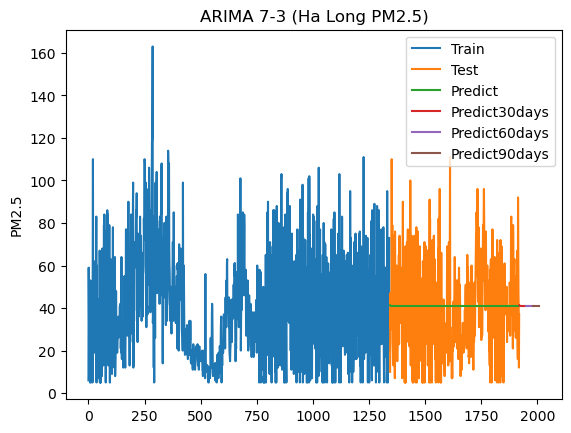

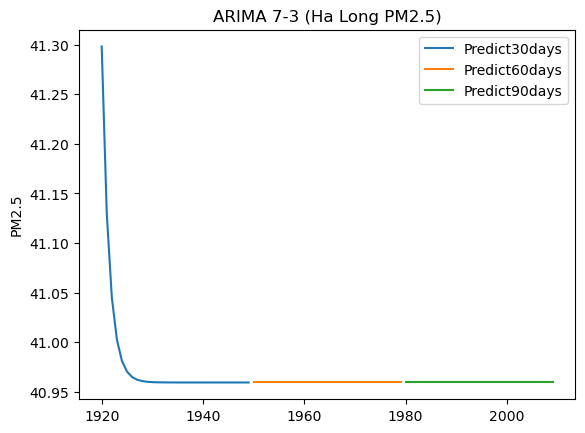

In [12]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)


last_data = pd.RangeIndex(start=last_index+1, stop=last_index+31, step=1)
plt.plot(last_data,y_next_30_days[0:30])

last_data = pd.RangeIndex(start=last_index+31, stop=last_index+61, step=1)
plt.plot(last_data,y_next_30_days[30:60])

last_data = pd.RangeIndex(start=last_index+61, stop=last_index+91, step=1)
plt.plot(last_data,y_next_30_days[60:90])
plt.legend(['Train','Test','Predict','Predict30days', 'Predict60days', 'Predict90days'])
plt.title('ARIMA 7-3 (Ha Long PM2.5)')
plt.ylabel('PM2.5')
plt.show()


#DỰ đians 90 ngày
last_data = pd.RangeIndex(start=last_index+1, stop=last_index+31, step=1)
plt.plot(last_data,y_next_30_days[0:30])

last_data = pd.RangeIndex(start=last_index+31, stop=last_index+61, step=1)
plt.plot(last_data,y_next_30_days[30:60])

last_data = pd.RangeIndex(start=last_index+61, stop=last_index+91, step=1)
plt.plot(last_data,y_next_30_days[60:90])
plt.legend(['Predict30days', 'Predict60days', 'Predict90days'])
plt.title('ARIMA 7-3 (Ha Long PM2.5)')
plt.ylabel('PM2.5')
plt.show()

